In [4]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房屋价值数据集
import pandas as pd

In [8]:
housevalue = fch() #会需要下载，大家可以提前运行试试看

In [11]:
housevalue.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
X = pd.DataFrame(housevalue.data) #放入DataFrame中便于查看
y = housevalue.target

In [12]:
X.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [14]:
X.shape

(20640, 8)

In [15]:
y.shape

(20640,)

In [18]:
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [19]:
X.columns = housevalue.feature_names

In [20]:
"""
MedInc：该街区住户的收入中位数
HouseAge：该街区房屋使用年代的中位数
AveRooms：该街区平均的房间数目
AveBedrms：该街区平均的卧室数目
Population：街区人口
AveOccup：平均入住率
Latitude：街区的纬度
Longitude：街区的经度
"""

'\nMedInc：该街区住户的收入中位数\nHouseAge：该街区房屋使用年代的中位数\nAveRooms：该街区平均的房间数目\nAveBedrms：该街区平均的卧室数目\nPopulation：街区人口\nAveOccup：平均入住率\nLatitude：街区的纬度\nLongitude：街区的经度\n'

In [21]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [25]:
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
Xtrain.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [24]:
Xtrain.shape

(14448, 8)

In [26]:
reg = LR().fit(Xtrain, Ytrain)
yhat = reg.predict(Xtest)
yhat

array([1.51384887, 0.46566247, 2.2567733 , ..., 2.11885803, 1.76968187,
       0.73219077])

In [28]:
reg.coef_ #系数w

array([ 4.37358931e-01,  1.02112683e-02, -1.07807216e-01,  6.26433828e-01,
        5.21612535e-07, -3.34850965e-03, -4.13095938e-01, -4.26210954e-01])

In [29]:
[*zip(Xtrain.columns,reg.coef_)]

[('MedInc', 0.4373589305968403),
 ('HouseAge', 0.010211268294494038),
 ('AveRooms', -0.10780721617317715),
 ('AveBedrms', 0.6264338275363783),
 ('Population', 5.216125353178735e-07),
 ('AveOccup', -0.0033485096463336094),
 ('Latitude', -0.4130959378947711),
 ('Longitude', -0.4262109536208467)]

In [30]:
reg.intercept_

-36.25689322920386

In [31]:
from sklearn.metrics import mean_squared_error as MSE
MSE(yhat,Ytest)

0.5309012639324571

In [32]:
y.max()

5.00001

In [33]:
y.min()

0.14999

In [41]:
#cross_val_score(reg,X,y,cv=10,scoring="mean_squared_error")

In [35]:
#为什么报错了？来试试看！
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [36]:
cross_val_score(reg,X,y,cv=10,scoring="neg_mean_squared_error")

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [39]:
#调用R2
from sklearn.metrics import r2_score
r2_score(Ytest,yhat) #前面为真实值，后面为预测值

0.6043668160178817

In [37]:
r2 = reg.score(Xtest,Ytest)
r2

0.6043668160178817

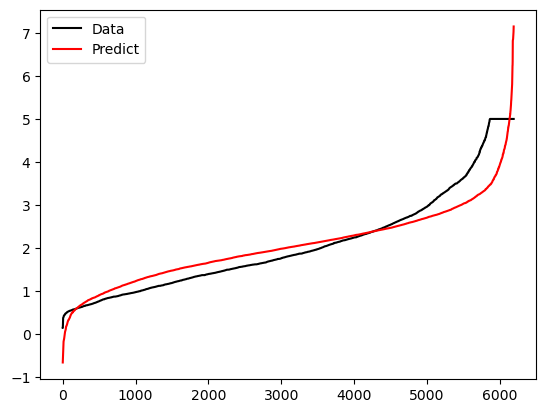

In [40]:
import matplotlib.pyplot as plt
sorted(Ytest)
plt.plot(range(len(Ytest)),sorted(Ytest),c="black",label= "Data")
plt.plot(range(len(yhat)),sorted(yhat),c="red",label = "Predict")
plt.legend()
plt.show()